In [19]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_rows = 10

# 1. Datos de carga de la Red Neuronal
Siempre que trabajemos con algoritmos de machine learning que utilicen un proceso estocástico(por ejemplo, números aleatorios), es una buena idea establecer la semilla del número aleatorio.
Esto es para que pueda ejecutar el mismo código una y otra vez y obtener el mismo resultado. Esto es útil si necesita demostrar un resultado, comparar algoritmos usando la misma fuente de 
aleatoriedad o depurar una parte de su código.

In [1]:
# Crea tu primer MLP en Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
# Fija las semillas aleatorias para la reproducibilidad
numpy.random.seed(7)

C:\Users\Jergb\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [57]:
data = pd.read_csv('pima-indians-diabetes.csv')
data

,N. embarazos,Concentración de glucosa,Presión arterial diastólica,Grosor del pliegue de la piel,Insulina sérica,masa corporal,pedigrí de la diabetes,Edad,Clase
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [21]:
data.values

array([[1.00e+00, 8.50e+01, 6.60e+01, ..., 3.51e-01, 3.10e+01, 0.00e+00],
       [8.00e+00, 1.83e+02, 6.40e+01, ..., 6.72e-01, 3.20e+01, 1.00e+00],
       [1.00e+00, 8.90e+01, 6.60e+01, ..., 1.67e-01, 2.10e+01, 0.00e+00],
       ...,
       [5.00e+00, 1.21e+02, 7.20e+01, ..., 2.45e-01, 3.00e+01, 0.00e+00],
       [1.00e+00, 1.26e+02, 6.00e+01, ..., 3.49e-01, 4.70e+01, 1.00e+00],
       [1.00e+00, 9.30e+01, 7.00e+01, ..., 3.15e-01, 2.30e+01, 0.00e+00]])

In [ ]:
# carga los datos
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# dividido en variables de entrada (X) y salida (Y)
X = dataset[:,0:8]
Y = dataset[:,8]
dataset

Hemos inicializado nuestro generador de números aleatorios para asegurarnos de que nuestros resultados sean reproducibles y cargamos nuestros datos. Ahora estamos listos para definir nuestro modelo de red neuronal.

# 2. Definir el modelo de la Red Neuronal

Los modelos en Keras se definen como una secuencia de capas. Creamos un modelo secuencial y añadimos capas una a una hasta que estamos satisfechos con nuestra topología de red. Lo primero que hay que hacer es asegurarse de que la capa de entrada tiene el número correcto de entradas. Esto se puede especificar al crear la primera capa con el argumento input_dim y establecerlo en 8 para las 8 variables de entrada.

## ¿Cómo sabemos el número de capas y sus tipos?

Esta es una pregunta muy difícil. Hay estructuras de redes expertas que podemos utilizar y a menudo la mejor estructura de red se encuentra a través de un proceso de experimentación de ensayo y error. Por lo general, se necesita una red lo suficientemente grande para capturar la estructura del problema.

En este ejemplo, utilizaremos una estructura de red conectada con tres capas.

Las capas completamente conectadas se densifican utilizando la clase **Dense**. Podemos especificar el número de neuronas en la capa como el primer argumento y especificar la función de activación usando el argumento de activación. Usaremos la función de activación del rectificador (**relu**) en las dos primeras capas y la función de activación sigmoide en la capa de salida. Antes las funciones de activación sigmoide y tanh eran preferidas para todas las capas. Hoy en día, se observa un mejor rendimiento utilizando la función de activación del rectificador. Utilizamos una función de activación sigmoide en la capa de salida para asegurarnos de que nuestra salida de red está entre 0 y 1 y es fácil de mapear a cualquier probabilidad de clase 1 o encajar en una clase dura de cualquiera de las dos clases con un umbral por defecto de 0,5. Unimos todo sumando cada capa. La primera capa oculta tiene 12 neuronas y espera 8 variables de entrada (p. ej. entrada dim=8). La segunda capa oculta tiene 8 neuronas y finalmente la capa de salida que tiene 1 neurona para predecir la clase (inicio de diabetes o no).

In [8]:
# crea el modelo
model = Sequential()

# model.add.Dense(Dimensiones del espacio de salida, dimensión de entrada,
    # inicializador para la matriz de ponderaciones, función de activación relu)

# Añade una capa 2D de 12 neuronas y espera 8 variables de entrada.
model.add(Dense(12, input_dim=8, activation='relu'))
# Añade una capa 2D oculta de 8 neuronas
model.add(Dense(8, activation='relu'))
# Añade una capa de salida con una neurona para predecir la clase
model.add(Dense(1, activation='sigmoid'))

# 3. Modelo de compilación de la Red Neuronal

Ahora que el modelo está definido, podemos compilarlo.

La compilación del modelo utiliza las eficientes librerías numéricas de backend como Theano o TensorFlow. El backend elige automáticamente la mejor manera de representar la red para entrenar y hacer predicciones para que se ejecuten en su hardware, como CPU o GPU o incluso distribuidas.

Al compilar, debemos especificar algunas propiedades adicionales necesarias para la formación de la red. Recuerde que entrenar una red significa encontrar el mejor conjunto de pesos para hacer predicciones para este problema.

**Debemos especificar la función de pérdida a utilizar para evaluar un conjunto de pesos, el optimizador utilizado para buscar a través de diferentes pesos para la red y cualquier métrica opcional que nos gustaría recopilar y reportar durante el entrenamiento.**

En este caso, utilizaremos la pérdida logarítmica, que para un problema de clasificación binaria se define en Keras como “binary_crossentropy”. También utilizaremos el algoritmo de descenso de gradiente eficiente “adam” por su alta eficiencia en estos problemas.

Finalmente, debido a que es un problema de clasificación, recopilaremos y reportaremos la exactitud de la clasificación como la métrica.

In [10]:
# Compila el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. Modelo de ajuste de la Red Neuronal
Hemos definido nuestro modelo y lo hemos compilado listo para un cálculo eficiente. Ahora es el momento de ejecutar el modelo sobre algunos datos. Podemos entrenar o ajustar nuestro modelo a los datos cargados llamando a la función fit() en el modelo.

El proceso de entrenamiento se ejecutará para un número fijo de iteraciones denominado epochs o épocas. También podemos establecer el número de instancias que se evalúan antes de que se realice una actualización de peso en la red llamada batch_size y establecerlo mediante el argumento batch_size. Para este problema utilizaremos un pequeño número de epochs (150) y un batch_size relativamente pequeño (10). Una vez más, estos pueden ser elegidos experimentalmente por ensayo y error.

In [31]:
# Ajusta el modelo
#model.fit(X, Y, epochs=150, batch_size=10)
model.fit(X, Y, epochs=200, batch_size=10)

Epoch 1/200
768/768 [==============================] - 0s 131us/step - loss: 0.3831 - acc: 0.8255
Epoch 2/200
768/768 [==============================] - 0s 115us/step - loss: 0.4003 - acc: 0.8125
Epoch 3/200
768/768 [==============================] - 0s 124us/step - loss: 0.4084 - acc: 0.7982
Epoch 4/200
768/768 [==============================] - 0s 110us/step - loss: 0.3925 - acc: 0.8112
Epoch 5/200
768/768 [==============================] - 0s 107us/step - loss: 0.3956 - acc: 0.8268
Epoch 6/200
768/768 [==============================] - 0s 109us/step - loss: 0.4039 - acc: 0.8099
Epoch 7/200
768/768 [==============================] - 0s 111us/step - loss: 0.4077 - acc: 0.8216
Epoch 8/200
768/768 [==============================] - 0s 114us/step - loss: 0.4014 - acc: 0.8138
Epoch 9/200
768/768 [==============================] - 0s 119us/step - loss: 0.4181 - acc: 0.7930
Epoch 10/200
768/768 [==============================] - 0s 132us/step - loss: 0.4082 - acc: 0.7969
Epoch 11/200
768/76

768/768 [==============================] - 0s 116us/step - loss: 0.3801 - acc: 0.8333
Epoch 84/200
768/768 [==============================] - 0s 111us/step - loss: 0.3929 - acc: 0.8151
Epoch 85/200
768/768 [==============================] - 0s 108us/step - loss: 0.4222 - acc: 0.8047
Epoch 86/200
768/768 [==============================] - 0s 108us/step - loss: 0.3925 - acc: 0.8177
Epoch 87/200
768/768 [==============================] - 0s 98us/step - loss: 0.3751 - acc: 0.8281
Epoch 88/200
768/768 [==============================] - 0s 107us/step - loss: 0.3831 - acc: 0.8099
Epoch 89/200
768/768 [==============================] - 0s 118us/step - loss: 0.3865 - acc: 0.8268
Epoch 90/200
768/768 [==============================] - 0s 99us/step - loss: 0.3866 - acc: 0.8203
Epoch 91/200
768/768 [==============================] - 0s 91us/step - loss: 0.3833 - acc: 0.8281
Epoch 92/200
768/768 [==============================] - 0s 90us/step - loss: 0.3846 - acc: 0.8203
Epoch 93/200
768/768 [=====

768/768 [==============================] - 0s 137us/step - loss: 0.3772 - acc: 0.8229
Epoch 166/200
768/768 [==============================] - 0s 120us/step - loss: 0.4032 - acc: 0.8047
Epoch 167/200
768/768 [==============================] - 0s 109us/step - loss: 0.4043 - acc: 0.8203
Epoch 168/200
768/768 [==============================] - 0s 91us/step - loss: 0.3917 - acc: 0.8099
Epoch 169/200
768/768 [==============================] - 0s 94us/step - loss: 0.3841 - acc: 0.8151
Epoch 170/200
768/768 [==============================] - 0s 95us/step - loss: 0.3925 - acc: 0.8333
Epoch 171/200
768/768 [==============================] - 0s 90us/step - loss: 0.3882 - acc: 0.8229
Epoch 172/200
768/768 [==============================] - 0s 108us/step - loss: 0.3879 - acc: 0.8203
Epoch 173/200
768/768 [==============================] - 0s 100us/step - loss: 0.3790 - acc: 0.8255
Epoch 174/200
768/768 [==============================] - 0s 105us/step - loss: 0.3942 - acc: 0.8177
Epoch 175/200
768/

# 5. Evaluar el modelo de la Red Neuronal
Hemos entrenado nuestra red neuronal en todo el conjunto de datos y podemos evaluar el rendimiento de la red en el mismo conjunto de datos.

Esto sólo nos dará una idea de lo bien que hemos modelado el conjunto de datos, pero no nos dará una idea de lo bien que el algoritmo podría funcionar con los nuevos datos. Hemos hecho esto por simplicidad, pero lo ideal sería que separara sus datos en conjuntos de datos de entreno y de prueba para la formación y evaluación de su modelo. Resaltamos esta frase ya que es importante:

### Lo ideal sería que separara sus datos en conjuntos de datos de entreno y de prueba para la formación y evaluación de su modelo.

Usted puede evaluar su modelo en su conjunto de datos de entrenamiento usando la función evaluate() y pasarle la misma entrada y salida usada para entrenar el modelo.

Esto generará una predicción para cada par de entrada y salida y recogerá las puntuaciones, incluyendo la pérdida media y cualquier métrica que haya configurado, como la precisión.

In [32]:
# evalua el modelo
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

768/768 [==============================] - 0s 17us/step

acc: 82.81%


# 6. Nuestra Primera Red Neural

Acaba de ver cómo puede crear fácilmente su primer modelo de red neuronal en Keras.

Vamos a enlazarlo todo en un ejemplo con el código completo.

In [15]:
# Crea tu primer MLP en Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
# Fija las semillas aleatorias para la reproducibilidad
numpy.random.seed(7)
# carga los datos
# dividido en variables de entrada (X) y salida (Y)
X = dataset[:,0:8]
Y = dataset[:,8]
# crea el modelo
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compila el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Ajusta el modelo
model.fit(X, Y, epochs=150, batch_size=10)
# evalua el modelo
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/150
768/768 [==============================] - 0s 485us/step - loss: 3.7090 - acc: 0.5977
Epoch 2/150
768/768 [==============================] - 0s 105us/step - loss: 0.9370 - acc: 0.5911
Epoch 3/150
768/768 [==============================] - 0s 128us/step - loss: 0.7467 - acc: 0.6419
Epoch 4/150
768/768 [==============================] - 0s 126us/step - loss: 0.7123 - acc: 0.6563
Epoch 5/150
768/768 [==============================] - 0s 121us/step - loss: 0.6817 - acc: 0.6784
Epoch 6/150
768/768 [==============================] - 0s 118us/step - loss: 0.6513 - acc: 0.6823
Epoch 7/150
768/768 [==============================] - 0s 130us/step - loss: 0.6495 - acc: 0.6706
Epoch 8/150
768/768 [==============================] - 0s 115us/step - loss: 0.6369 - acc: 0.6888
Epoch 9/150
768/768 [==============================] - 0s 103us/step - loss: 0.6246 - acc: 0.6914
Epoch 10/150
768/768 [==============================] - 0s 102us/step - loss: 0.6297 - acc: 0.6784
Epoch 11/150
768/76

768/768 [==============================] - 0s 102us/step - loss: 0.4974 - acc: 0.7643
Epoch 85/150
768/768 [==============================] - 0s 100us/step - loss: 0.5053 - acc: 0.7474
Epoch 86/150
768/768 [==============================] - 0s 116us/step - loss: 0.5071 - acc: 0.7474
Epoch 87/150
768/768 [==============================] - 0s 139us/step - loss: 0.5000 - acc: 0.7630
Epoch 88/150
768/768 [==============================] - 0s 134us/step - loss: 0.5009 - acc: 0.7669
Epoch 89/150
768/768 [==============================] - 0s 144us/step - loss: 0.5066 - acc: 0.7617
Epoch 90/150
768/768 [==============================] - 0s 129us/step - loss: 0.5106 - acc: 0.7474
Epoch 91/150
768/768 [==============================] - 0s 137us/step - loss: 0.5005 - acc: 0.7487
Epoch 92/150
768/768 [==============================] - 0s 143us/step - loss: 0.5065 - acc: 0.7435
Epoch 93/150
768/768 [==============================] - 0s 131us/step - loss: 0.4989 - acc: 0.7591
Epoch 94/150
768/768 [=

Tenga en cuenta que la habilidad de su modelo puede variar.

Las redes neuronales son un algoritmo estocástico, lo que significa que el mismo algoritmo con los mismos datos puede entrenar un modelo diferente con habilidades diferentes. Esto es una característica, no un error.

# 7. Hacer predicciones
Podemos adaptar el ejemplo anterior y usarlo para generar predicciones sobre el conjunto de datos de entrenamiento, pretendiendo que es un nuevo conjunto de datos que no hemos visto antes.

Hacer predicciones es tan fácil como llamar a model.predict(). Estamos utilizando una función de activación sigmoide en la capa de salida, por lo que las predicciones estarán en el rango entre 0 y 1. Podemos convertirlas fácilmente en una predicción binaria nítida para esta tarea de clasificación redondeándolas.

El ejemplo completo que hace predicciones para cada registro en los datos de entrenamiento se enumeran a continuación.

In [ ]:
# Crea tu primer MLP en Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
# Fija las semillas aleatorias para la reproducibilidad
numpy.random.seed(7)
# carga los datos

# dividido en variables de entrada (X) y salida (Y)
X = dataset[:,0:8]
Y = dataset[:,8]
# crea el modelo
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compila el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Ajusta el modelo
model.fit(X, Y, epochs=150, batch_size=10)
# calcula las predicciones
predictions = model.predict(X)
# redondeamos las predicciones
rounded = [round(x[0]) for x in predictions]

82.8125

[1.0, 0.0, 1.0, 0.0, 1.0]
[1. 0. 1. 0. 1.]


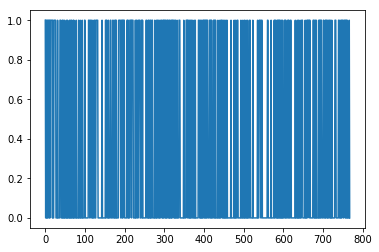

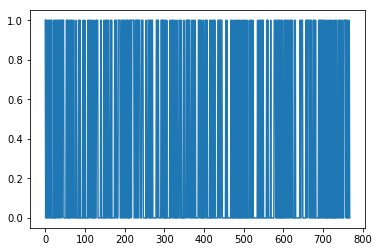

In [56]:
predictions = model.predict(X)
# redondeamos las predicciones
rounded = [round(x[0]) for x in predictions]
plt.plot(Y)
plt.figure()
plt.plot(rounded)
print(rounded[0:5])
print(Y[0:5])

In [ ]:
[round(x[0]) for x in model.predict(X[0:5])]

In [118]:
#Hace la predicción del valor para la primera fila
round((model.predict(numpy.array([[6,148,72,35,0,33.6,.625,50]])))[0][0])

1.0